# Chapter 8: Play

## Reinforcement Learning

_Reinforcement learning_ (RL) is a field of machine learning that aims to train an agent to perform a task optimally in a given environment and metric for measuring success.

Below are some definitions of reinforcement learning terms that will be used in this notebook and other notebooks in this directory.

-    *Evironment*

     The world in which the agent operates. It is also the mechanism that computes the game state and reward as the agent takes actions in this world.

-   *Agent*
    
    The entity that takes actions in the evironment.

-   *Game state*
    
    The data that represents the current position in the evironment the agent is in.

-   *Action*
    
    An element of the set of possible inputs (or "actions") that the agent can supply to the environment to earn reward and change the game state.

-   *Reward*

    A value returned by the environment which is used as a metric which indicates how well the agent is performing the particular task.

-   *Episode*

    A single run of the agent inputting an action into the environment. This is also called a _rollout_.

-   *Timestep*

    For a discrete event environment, this is the unit of time we use to index all states, actions, and rewards.

## OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is a Python library which simulates multiple environments for training RL agents. Below is some example code which runs the `CarRacing` environment using an agent that just takes random actions.

### Rendering the Environment

Below is code for rendering the `CarRacing-v0` environment in Colab.

In [1]:
!pip3 install Box2D gym

     |████████████████████████████████| 1.3MB 9.2MB/s 


In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [3]:
!pip3 install pyvirtualdisplay

In [4]:
from pyvirtualdisplay import Display

display = Display(visible=0, size=(300, 300))
display.start()

In [5]:
import gym

env = gym.make('CarRacing-v0')
obs = env.reset()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Track generation: 1104..1384 -> 280-tiles track


In [6]:
obs.shape

(96, 96, 3)

The action space for this environment is a `Box` environment of shape `(3,)`, meaning that it takes a 3-D vector of floats as an input, the steering, acceleration, and brake inputs respectively. The steering action must be in the interval [-1, 1]. The acceleration and brake two must be in [0, 1].

In [7]:
env.action_space

Box(3,)

In [8]:
env.action_space.low, env.action_space.high

(array([-1.,  0.,  0.], dtype=float32), array([1., 1., 1.], dtype=float32))

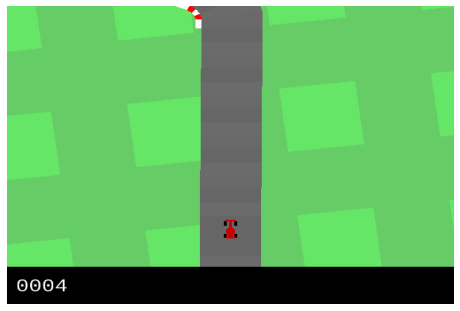

In [9]:
import matplotlib.pyplot as plt

STARTUP_FRAMES = 30

for _ in range(STARTUP_FRAMES):
  env.step([0, 0, 0])

img = env.render(mode='rgb_array')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.show()

### Plotting an Animation of an Agent

Below we will be plotting an animation of an agent that acts randomly in the environment.

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML

def update_scene(num, frames, patch):
  """Update the animation scene after a single frame."""
  patch.set_data(frames[num])
  return patch,

def plot_animation(frames, repeat=False, interval=40):
  """Utility function for """
  plt.close()
  fig = plt.figure()
  patch = plt.imshow(frames[0])
  plt.axis('off')
  anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                 frames=len(frames), repeat=repeat,
                                 interval=interval)
  return HTML(anim.to_html5_video())

In [11]:
import numpy as np

env.reset()

for _ in range(STARTUP_FRAMES):
  env.step([0, 0, 0])

frames = []

while True:
  obs, reward, done, info = env.step(env.action_space.sample())
  frames.append(env.render(mode='rgb_array'))
  if done:
    break

Track generation: 1101..1380 -> 279-tiles track


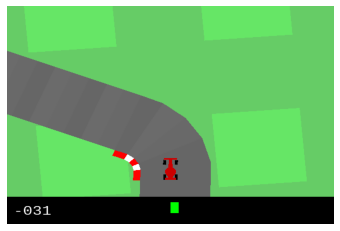

In [12]:
plot_animation(frames)